In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Walks - {today}"

In [4]:
session_id = '171'

In [5]:
task = "plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season."
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Plan'}}
----
Distance to neareast plan: 0.3924887180328369
Modifying nearest plan with User input
{'Plan': {'messages': [HumanMessage(content='Here is the revised plan to plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season:\n\n1. Use the `playerid_lookup` function to get the \'key_mlbam\' ID for Shane Bieber by passing in his last name \'bieber\' and first name \'shane\'.\n\n2. Use the `statcast_pitcher` function to get Shane Bieber\'s pitch-level data for the 2020 season. Pass in the following:\n   - start_dt: \'2020-01-01\'\n   - end_dt: \'2020-12-31\'\n   - player_id: Use the \'key_mlbam\' value from step 1\n\n3. From the output of `statcast_pitcher`, select only the \'game_date\' and \'bb_type\' columns.\n\n4. Create a new column \'walk\' that is 1 when the \'bb_type\' value is not \'null\' and 0 otherwise.\n\n5. Group the data by \'game_date\' and sum the \'walk\' column to get Bieber\'s walk total for each game.\n\n6. Sort th

In [6]:
task = "include only 5 dates total in the x axis label"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content='Here is the revised plan to plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season, with only 5 dates shown on the x-axis:\n\n1. Use the `playerid_lookup` function to get the \'key_mlbam\' ID for Shane Bieber by passing in his last name \'bieber\' and first name \'shane\'.\n\n2. Use the `statcast_pitcher` function to get Shane Bieber\'s pitch-level data for the 2020 season. Pass in the following:\n   - start_dt: \'2020-01-01\' \n   - end_dt: \'2020-12-31\'\n   - player_id: Use the \'key_mlbam\' value from step 1\n\n3. From the output of `statcast_pitcher`, select only the \'game_date\' and \'bb_type\' columns.\n\n4. Create a new column \'walk\' that is 1 when the \'bb_type\' value is not \'null\' and 0 otherwise.  \n\n5. Group the data by \'game_date\' and sum the \'walk\' column to get Bieber\'s walk total for each game.\n\n6. Sort the data by \'game_date\'.\n\n7. Calculat

{'Orchestrate': {'next': 'Convert'}}
----
{'Convert': {'code': "\n# Import necessary libraries\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom pybaseball import playerid_lookup, statcast_pitcher\n\n# 1. Get Shane Bieber's 'key_mlbam' ID\nbieber_id = playerid_lookup('bieber', 'shane')['key_mlbam'].values[0]\n\n# 2. Get Shane Bieber's pitch-level data for 2020 season\nbieber_2020 = statcast_pitcher('2020-01-01', '2020-12-31', bieber_id)\n\n# 3. Select relevant columns\nbieber_2020 = bieber_2020[['game_date', 'bb_type']]\n\n# 4. Create 'walk' column\nbieber_2020['walk'] = bieber_2020['bb_type'].apply(lambda x: 1 if x != 'null' else 0)\n\n# 5. Group by game_date and sum walks\nbieber_daily_walks = bieber_2020.groupby('game_date')['walk'].sum().reset_index()\n\n# 6. Sort by game_date\nbieber_daily_walks = bieber_daily_walks.sort_values('game_date')\n\n# 7. Calculate cumulative sum of walks\nbieber_daily_walks['cum_sum_walks'] = bieber_daily_walks['walk'].cumsum()\n\n# 8. Plot cu

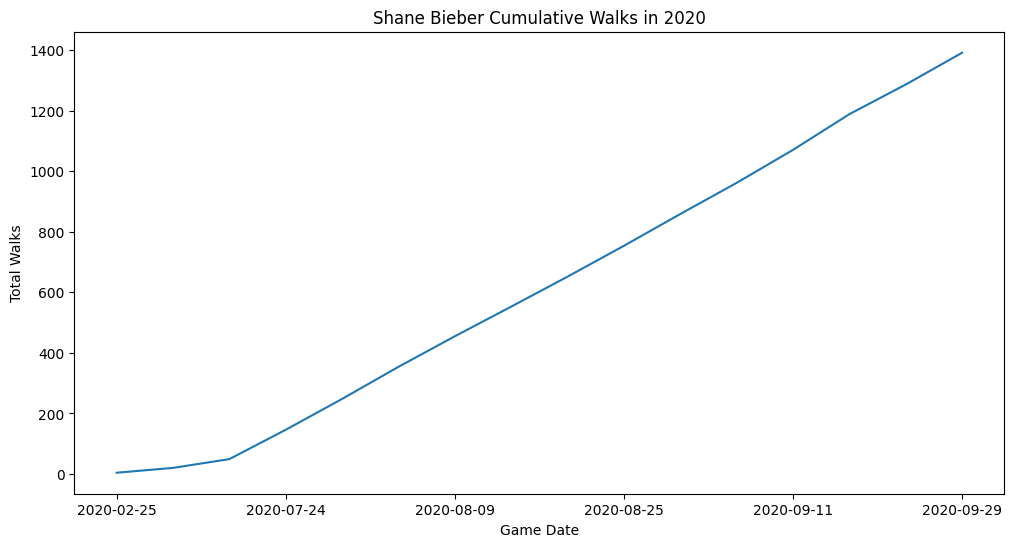

{'Execute': {'messages': [AIMessage(content="\nHere is the code that was used to reach this solution:\n```python\n\n# Import necessary libraries\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom pybaseball import playerid_lookup, statcast_pitcher\n# 1. Get Shane Bieber's 'key_mlbam' ID\nbieber_id = playerid_lookup('bieber', 'shane')['key_mlbam'].values[0]\n# 2. Get Shane Bieber's pitch-level data for 2020 season\nbieber_2020 = statcast_pitcher('2020-01-01', '2020-12-31', bieber_id)\n# 3. Select relevant columns\nbieber_2020 = bieber_2020[['game_date', 'bb_type']]\n# 4. Create 'walk' column\nbieber_2020['walk'] = bieber_2020['bb_type'].apply(lambda x: 1 if x != 'null' else 0)\n# 5. Group by game_date and sum walks\nbieber_daily_walks = bieber_2020.groupby('game_date')['walk'].sum().reset_index()\n# 6. Sort by game_date\nbieber_daily_walks = bieber_daily_walks.sort_values('game_date')\n# 7. Calculate cumulative sum of walks\nbieber_daily_walks['cum_sum_walks'] = bieber_daily_wa

In [7]:
task = "yep"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [8]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [AIMessage(content='Thank you, task has been commited to memory')], 'previous_node': 'Memorize'}}
----
Thank you, task has been commited to memory
